In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

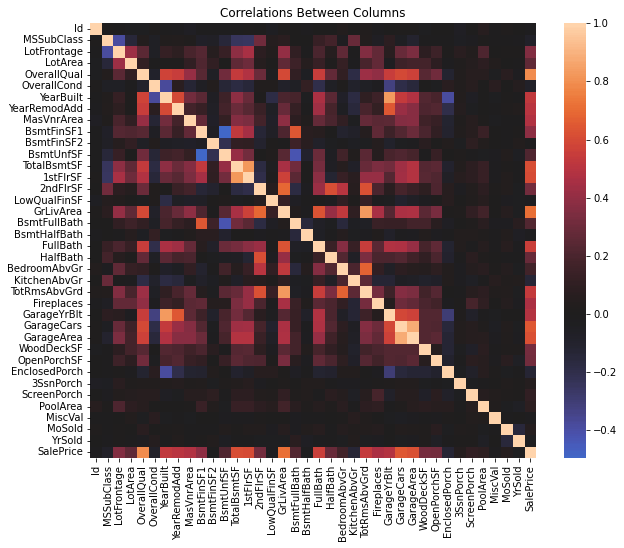

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [5]:
y = train_data.SalePrice
X = train_data.drop(columns=["SalePrice"], axis=1)
y.shape, X.shape, test_data.shape

((1460,), (1460, 80), (1459, 80))

In [6]:
corr_matrix = train_data.corr()
corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.40) | (corr_matrix["SalePrice"] < -0.40)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [7]:
important_num_cols = list(corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.5) | (corr_matrix["SalePrice"] < -0.5)].index)

important_num_cols.remove('SalePrice')
len(important_num_cols)

10

In [8]:
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [9]:
X_num_only = X[important_num_cols]
X_num_only.shape

(1460, 10)

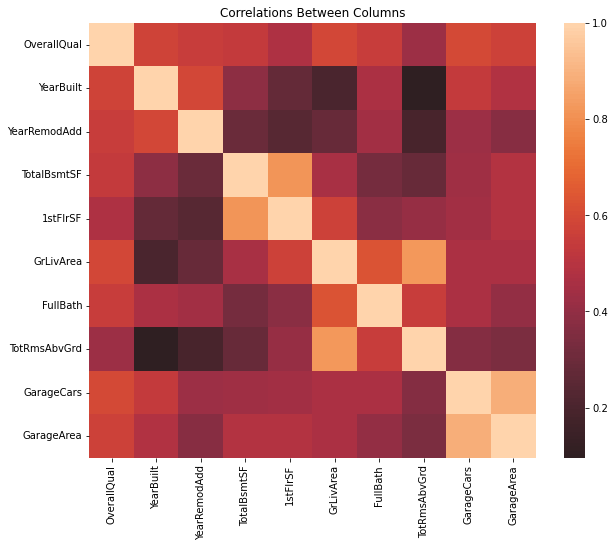

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(X_num_only.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [11]:
corr_X = X_num_only.corr()
len(corr_X)

10

In [12]:
for i in range(0, len(corr_X) - 1):
    for j in range(i + 1, len(corr_X)):
        if(corr_X.iloc[i, j] < -0.6 or corr_X.iloc[i, j] > 0.6):
            print(corr_X.iloc[i, j], i, j, corr_X.index[i], corr_X.index[j])

0.6006707165907149 0 8 OverallQual GarageCars
0.8195299750050339 3 4 TotalBsmtSF 1stFlrSF
0.6300116462511148 5 6 GrLivArea FullBath
0.8254893743088425 5 7 GrLivArea TotRmsAbvGrd
0.882475414281462 8 9 GarageCars GarageArea


In [13]:
num_cols = [i for i in X_num_only.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]

In [14]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
X_final = X[num_cols]

In [15]:
X_final.shape

(1460, 6)

In [16]:
X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars
0,7,2003,0,856,1710,2
1,6,1976,0,1262,1262,2
2,7,2001,1,920,1786,2
3,7,1915,55,756,1717,3
4,8,2000,0,1145,2198,3


In [18]:
X_final.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
dtype: int64

In [19]:
X[cat_cols].isna().sum()

MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [20]:
X_categorical_df = pd.get_dummies(X[cat_cols], columns=cat_cols)
X_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1456,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1457,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1458,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [21]:
X_final = X_final.join(X_categorical_df)
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,0,856,1710,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,0,1262,1262,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,1,920,1786,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,55,756,1717,3,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,0,1145,2198,3,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,1,953,1647,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,10,1542,2073,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,65,1152,2340,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,46,1078,1078,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [22]:
from sklearn import preprocessing
standardize = preprocessing.StandardScaler().fit(X_final[num_cols])

In [23]:
standardize.mean_

array([6.09931507e+00, 1.97126781e+03, 1.35979452e+01, 1.05742945e+03,
       1.51546370e+03, 1.76712329e+00])

In [24]:
X_final[num_cols] = standardize.transform(X_final[num_cols])
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.514873,-0.238122,0.250402,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,0.222975,-0.147046,1.104925,1.061367,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,0.651479,-1.002492,2.100780,0.215641,1.569647,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,-0.704406,1.324258,0.046905,-0.832788,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [25]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 37), (292, 37), (1168,), (292,))

In [27]:
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
perf = []
method = []
from sklearn.metrics import mean_squared_log_error
 
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
method.append('Linear Regression')
perf.append(rmsle)

R2 Score: 0.7670082797567473
RMSLE: 0.21036228385833014


In [28]:
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [29]:
perf = []
method = []
from sklearn.metrics import mean_squared_log_error
 
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
method.append('Linear Regression')
perf.append(rmsle)

R2 Score: 0.7670082797567473
RMSLE: 0.21036228385833014


In [30]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Ridge Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.7671007768878559
RMSLE: 0.2044340731124903


In [31]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Lasso Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.7670332119031441
RMSLE: 0.20942259209429784


In [32]:
from sklearn.svm import SVR
svr = SVR(C=1000000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
#method.append('SVM')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)

R2 Score: 0.8637435960334137
RMSLE: 0.16149453487353432


In [33]:
svr_rbf = SVR(kernel="rbf", C=1000000, gamma=0.01, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
predictions = svr_rbf.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)

method.append('SVR')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.8831836872529845
RMSLE: 0.14215745800576357


In [34]:
for i in range(50 , 500, 50):
    random_forest = RandomForestRegressor(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predictions = random_forest.predict(X_val)

    r_squared = r2_score(predictions, y_val)

    print("R2 Score:", r_squared)
    method.append('Random Forest Regressor')
    rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
    print("RMSLE:", rmsle)
    perf.append(rmsle)

R2 Score: 0.8656460305662962
RMSLE: 0.157068575123803
R2 Score: 0.8830452977787356
RMSLE: 0.15699444492132794
R2 Score: 0.8808431307730346
RMSLE: 0.15362704146760509
R2 Score: 0.8752394504281495
RMSLE: 0.15495409128070178
R2 Score: 0.8844817338138735
RMSLE: 0.15581751494001908
R2 Score: 0.8756160451715226
RMSLE: 0.15510879326225455
R2 Score: 0.8783077800889636
RMSLE: 0.15450860736308314
R2 Score: 0.8802033701944113
RMSLE: 0.15552870232237823
R2 Score: 0.870522687676202
RMSLE: 0.1553130967117451


In [35]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('XGBoost Regressor')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.875913010348973
RMSLE: 0.15526616727922757


In [36]:

'''
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError



hidden_units1 = 400
#hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
      ])
    return model
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = model.fit(
    X_final.values, 
    y.values, 
    epochs=1000, 
    batch_size=64,
    validation_split=0.2
)
predictions = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
method.append('ANN')
perf.append(rmsle)
'''

'\nimport math\nimport pandas as pd\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras import Model\nfrom tensorflow.keras import Sequential\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.preprocessing import StandardScaler\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.losses import MeanSquaredLogarithmicError\n\n\n\nhidden_units1 = 400\n#hidden_units2 = 480\nhidden_units3 = 256\nlearning_rate = 0.01\n# Creating model using the Sequential in tensorflow\ndef build_model_using_sequential():\n    model = Sequential([\n        Dense(hidden_units1, kernel_initializer=\'normal\', activation=\'relu\'),\n        Dropout(0.2),\n        Dense(hidden_units3, kernel_initializer=\'normal\', activation=\'relu\'),\n        Dense(1, kernel_initializer=\'normal\', activation=\'linear\')\n      ])\n    return model\n# build the model\nmodel = build_model_using_sequential()\n\n# l

Text(0.5, 1.0, 'RMSLE comparison of models')

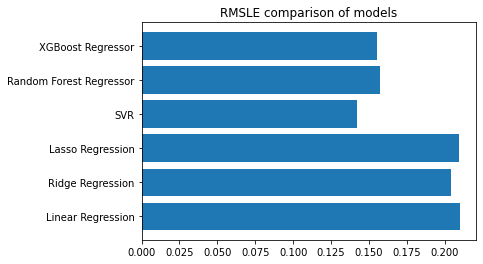

In [37]:
plt.barh(method, perf)
plt.title('RMSLE comparison of models')

In [38]:
X_test = test_data[num_cols + cat_cols]
X_test['YearRemodAdd'] = X_test['YearRemodAdd'] - X_test['YearBuilt']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
X_test.shape

(1459, 13)

In [40]:
X_test - pd.get_dummies(X_test)

,BldgType,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,GarageCars,GrLivArea,Heating,Heating_GasA,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBsmtSF,Utilities,Utilities_AllPub,YearBuilt,YearRemodAdd
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
1455,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
1456,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0
1457,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0


In [41]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,1961,0,882.0,896,1.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1,6,1958,0,1329.0,1329,1.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,5,1997,1,928.0,1629,2.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,6,1998,0,926.0,1604,2.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,8,1992,0,1280.0,1280,2.0,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
1455,4,1970,0,546.0,1092,1.0,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
1456,5,1960,36,1224.0,1224,2.0,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl
1457,5,1992,0,912.0,970,0.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


In [42]:
X_test = X_test.reindex(columns = X_final.columns, fill_value=0)
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,0,882.0,896,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1958,0,1329.0,1329,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1997,1,928.0,1629,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1998,0,926.0,1604,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1992,0,1280.0,1280,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,4,1970,0,546.0,1092,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,5,1960,36,1224.0,1224,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,5,1992,0,912.0,970,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_test[num_cols] = standardize.transform(X_test[num_cols])
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.795151,-0.340077,-0.555742,-0.400017,-1.179256,-1.026858,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.071836,-0.439440,-0.555742,0.619239,-0.354966,-1.026858,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.795151,0.852269,-0.514873,-0.295127,0.216136,0.311725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.071836,0.885390,-0.555742,-0.299687,0.168544,0.311725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.374795,0.686666,-0.555742,0.507509,-0.448246,0.311725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-2.365440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-1.026858,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,-0.795151,-0.373198,0.915562,0.379817,-0.554851,0.311725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,-0.795151,0.686666,-0.555742,-0.331610,-1.038384,-2.365440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_test.isna().sum()

OverallQual              0
YearBuilt                0
YearRemodAdd             0
TotalBsmtSF              1
GrLivArea                0
GarageCars               1
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Utilities_AllPub         0
Utilities_NoSeWa         0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
Heating_Floor            0
Heating_GasA             0
Heating_GasW             0
Heating_Grav             0
Heating_OthW             0
Heating_Wall             0
KitchenQual_Ex           0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
d

In [45]:
# we will use median for missing values
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].median())
# mode for cars
X_test['GarageCars'] = X_test['GarageCars'].fillna(train_data['GarageCars'].mode()[0])
# Submission using SVR

preds = svr_rbf.predict(X_test)
submit = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': preds})
submit.to_csv('submission.csv',index=False)
# Submission using ANN
'''
preds = model.predict(X_test)
preds_2 = [i[0] for i in preds]
out = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': preds_2}) 
out.to_csv('submission.csv',index=False)
'''

"\npreds = model.predict(X_test)\npreds_2 = [i[0] for i in preds]\nout = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': preds_2}) \nout.to_csv('submission.csv',index=False)\n"